In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
space_train = pd.read_csv("C:/Users/madhu/OneDrive/Desktop/spaceship-titanic/train.csv")
space_test = pd.read_csv("C:/Users/madhu/OneDrive/Desktop/spaceship-titanic/test.csv")

In [4]:
space_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
space_train.shape

(8693, 14)

In [6]:
space_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
space_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
space_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [9]:
space_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [10]:
home_planet = space_train['HomePlanet'].nunique()
print("Home Planet",home_planet)

cryo_sleep = space_train['CryoSleep'].nunique()
print("CryoSleep",cryo_sleep)

cabin = space_train['Cabin'].nunique()
print("Cabin",cabin)

Dest = space_train['Destination'].nunique()
print("Dest",Dest)

vip = space_train['VIP'].nunique()
print("VIP",vip)

name = space_train['Name'].nunique()
print("Name",name)

Home Planet 3
CryoSleep 2
Cabin 6560
Dest 3
VIP 2
Name 8473


In [11]:
mode_homeplanet  = space_train['HomePlanet'].mode()[0]
space_train['HomePlanet'].fillna(mode_homeplanet,inplace=True)

mode_homeplanet1  = space_test['HomePlanet'].mode()[0]
space_test['HomePlanet'].fillna(mode_homeplanet1,inplace=True)

In [12]:
mode_cryosleep = space_train['CryoSleep'].mode()[0]
space_train['CryoSleep'].fillna(mode_cryosleep,inplace=True)

In [13]:
mode_cryosleep1 = space_test['CryoSleep'].mode()[0]
space_test['CryoSleep'].fillna(mode_cryosleep1,inplace=True)

In [14]:
space_train['Cabin_missing'] = space_train['Cabin'].isna().astype(int)

In [15]:
space_test['Cabin_missing'] = space_test['Cabin'].isna().astype(int)

In [16]:
mode_dest = space_train['Destination'].mode()[0]
space_train['Destination'].fillna(mode_dest,inplace=True)

In [17]:
mode_dest1 = space_test['Destination'].mode()[0]
space_test['Destination'].fillna(mode_dest1,inplace=True)

In [18]:
median_age = space_train['Age'].median()
space_train['Age'].fillna(median_age,inplace=True)

In [19]:
median_age1 = space_test['Age'].median()
space_test['Age'].fillna(median_age1,inplace=True)

In [20]:
mode_vip = space_train['VIP'].mode()[0]
space_train['VIP'].fillna(mode_vip,inplace=True)

In [21]:
mode_vip1 = space_test['VIP'].mode()[0]
space_test['VIP'].fillna(mode_vip1,inplace=True)

In [22]:
median_room = space_train['RoomService'].median()
space_train['RoomService'].fillna(median_room,inplace=True)

median_food = space_train['FoodCourt'].median()
space_train['FoodCourt'].fillna(median_food,inplace=True)

median_shop= space_train['ShoppingMall'].median()
space_train['ShoppingMall'].fillna(median_shop,inplace=True)

median_spa = space_train['Spa'].median()
space_train['Spa'].fillna(median_spa,inplace=True)

median_vr = space_train['VRDeck'].median()
space_train['VRDeck'].fillna(median_vr,inplace=True)

In [23]:
median_room1 = space_test['RoomService'].median()
space_test['RoomService'].fillna(median_room1,inplace=True)

median_food1 = space_test['FoodCourt'].median()
space_test['FoodCourt'].fillna(median_food1,inplace=True)

median_shop1 = space_test['ShoppingMall'].median()
space_test['ShoppingMall'].fillna(median_shop1,inplace=True)

median_spa1 = space_test['Spa'].median()
space_test['Spa'].fillna(median_spa1,inplace=True)

median_vr1 = space_test['VRDeck'].median()
space_test['VRDeck'].fillna(median_vr1,inplace=True)

In [24]:
space_train['Name_missing'] = space_train['Name'].isna().astype(int)

In [25]:
space_test['Name_missing'] = space_test['Name'].isna().astype(int)

In [26]:
space_train.duplicated().sum()

0

In [27]:
space_test.duplicated().sum()

0

In [28]:
space_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_missing,Name_missing
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0,0
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0,0
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True,0,0
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,0,0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0,0


In [29]:
space_test.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            100
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name              94
Cabin_missing      0
Name_missing       0
dtype: int64

In [30]:
label_encoder = LabelEncoder()

In [31]:
space_train['HomePlanet_Encoded'] = label_encoder.fit_transform(space_train['HomePlanet'])
space_train['CryoSleep_Encoded'] = label_encoder.fit_transform(space_train['CryoSleep'])
space_train['Destination_Encoded'] = label_encoder.fit_transform(space_train['Destination'])
space_train['VIP_Encoded'] = label_encoder.fit_transform(space_train['VIP'])

In [32]:
space_test['HomePlanet_Encoded'] = label_encoder.fit_transform(space_test['HomePlanet'])
space_test['CryoSleep_Encoded'] = label_encoder.fit_transform(space_test['CryoSleep'])
space_test['Destination_Encoded'] = label_encoder.fit_transform(space_test['Destination'])
space_test['VIP_Encoded'] = label_encoder.fit_transform(space_test['VIP'])

In [33]:
space_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_missing,Name_missing,HomePlanet_Encoded,CryoSleep_Encoded,Destination_Encoded,VIP_Encoded
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0,1,0,2,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,0,0,2,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,1,0,2,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,1,0,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,0,0,2,0
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0,0,0,0,1,0
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0,0,0,0,2,0
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True,0,0,0,1,2,0
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,0,0,0,0,2,0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0,0,1,1,0,0


In [34]:
space_test.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_missing,Name_missing,HomePlanet_Encoded,CryoSleep_Encoded,Destination_Encoded,VIP_Encoded
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,0,0,1,2,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,0,0,0,2,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,0,1,1,0,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,0,1,0,2,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,0,0,0,2,0
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks,0,0,0,0,2,0
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,0.0,0.0,0.0,0.0,Aldah Ainserfle,0,0,1,1,0,0
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,0,0,1,1,2,0
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry,0,0,1,1,0,0
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson,0,0,0,0,0,0


In [35]:
new_space_train = space_train.drop(['HomePlanet','CryoSleep','Destination','Name','Cabin','VIP'],axis=1)

In [36]:
new_space_test = space_test.drop(['HomePlanet','CryoSleep','Destination','Name','Cabin','VIP'],axis=1)

In [37]:
new_space_train.head(10)

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_missing,Name_missing,HomePlanet_Encoded,CryoSleep_Encoded,Destination_Encoded,VIP_Encoded
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False,0,0,1,0,2,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True,0,0,0,0,2,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,0,2,1
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,0,2,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True,0,0,0,0,2,0
5,0005_01,44.0,0.0,483.0,0.0,291.0,0.0,True,0,0,0,0,1,0
6,0006_01,26.0,42.0,1539.0,3.0,0.0,0.0,True,0,0,0,0,2,0
7,0006_02,28.0,0.0,0.0,0.0,0.0,0.0,True,0,0,0,1,2,0
8,0007_01,35.0,0.0,785.0,17.0,216.0,0.0,True,0,0,0,0,2,0
9,0008_01,14.0,0.0,0.0,0.0,0.0,0.0,True,0,0,1,1,0,0


In [38]:
new_space_test.head(10)

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_missing,Name_missing,HomePlanet_Encoded,CryoSleep_Encoded,Destination_Encoded,VIP_Encoded
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,2,0
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,2,0
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,0,0,1,0,2,0
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,2,0
5,0027_01,31.0,0.0,1615.0,263.0,113.0,60.0,0,0,0,0,2,0
6,0029_01,21.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0
7,0032_01,20.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,2,0
8,0032_02,23.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0
9,0033_01,24.0,0.0,639.0,0.0,0.0,0.0,0,0,0,0,0,0


In [39]:
new_space_train = new_space_train.iloc[:,[0,10,11,8,12,1,13,2,3,4,5,6,9,7]]

In [42]:
new_space_test = new_space_test.iloc[:,[0,9,10,7,11,1,12,2,3,4,5,6,9]]

In [40]:
new_space_train.head(10)

,PassengerId,HomePlanet_Encoded,CryoSleep_Encoded,Cabin_missing,Destination_Encoded,Age,VIP_Encoded,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name_missing,Transported
0,0001_01,1,0,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,False
1,0002_01,0,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,0,True
2,0003_01,1,0,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,False
3,0003_02,1,0,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,False
4,0004_01,0,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,0,True
5,0005_01,0,0,0,1,44.0,0,0.0,483.0,0.0,291.0,0.0,0,True
6,0006_01,0,0,0,2,26.0,0,42.0,1539.0,3.0,0.0,0.0,0,True
7,0006_02,0,1,0,2,28.0,0,0.0,0.0,0.0,0.0,0.0,0,True
8,0007_01,0,0,0,2,35.0,0,0.0,785.0,17.0,216.0,0.0,0,True
9,0008_01,1,1,0,0,14.0,0,0.0,0.0,0.0,0.0,0.0,0,True


In [43]:
new_space_test.head(10)

,PassengerId,HomePlanet_Encoded,CryoSleep_Encoded,Cabin_missing,Destination_Encoded,Age,VIP_Encoded,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Encoded
0,0013_01,0,1,0,2,27.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0018_01,0,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,0
2,0019_01,1,1,0,0,31.0,0,0.0,0.0,0.0,0.0,0.0,1
3,0021_01,1,0,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,1
4,0023_01,0,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,0
5,0027_01,0,0,0,2,31.0,0,0.0,1615.0,263.0,113.0,60.0,0
6,0029_01,1,1,0,0,21.0,0,0.0,0.0,0.0,0.0,0.0,1
7,0032_01,1,1,0,2,20.0,0,0.0,0.0,0.0,0.0,0.0,1
8,0032_02,1,1,0,0,23.0,0,0.0,0.0,0.0,0.0,0.0,1
9,0033_01,0,0,0,0,24.0,0,0.0,639.0,0.0,0.0,0.0,0


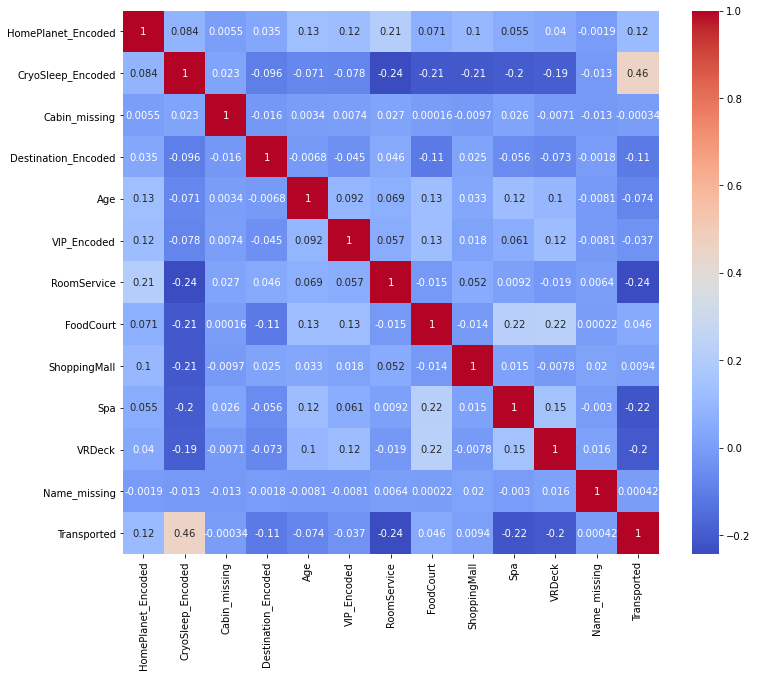

In [48]:
corr_matrix = new_space_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True,cmap="coolwarm")
plt.show()